## Removing the missing values

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('hepatitis.data', header=None)
df.tail(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2
154,1,43,1,2,2,1,2,2,2,2,1,1,1,2,1.20,100,19,3.1,42,2


In [3]:
df.columns = ["class", "age", "sex", "steroid", "antivirals","fatigue", "malaise", 
                 "anorexia", "liver_big","liver_firm", "spleen_palpable", "spiders", "ascites", 
                "varices", "bilirubin", "alk_phosphate", "sgot", 
               "albumin","protime", "histology"]
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   class            155 non-null    int64 
 1   age              155 non-null    int64 
 2   sex              155 non-null    int64 
 3   steroid          155 non-null    object
 4   antivirals       155 non-null    int64 
 5   fatigue          155 non-null    object
 6   malaise          155 non-null    object
 7   anorexia         155 non-null    object
 8   liver_big        155 non-null    object
 9   liver_firm       155 non-null    object
 10  spleen_palpable  155 non-null    object
 11  spiders          155 non-null    object
 12  ascites          155 non-null    object
 13  varices          155 non-null    object
 14  bilirubin        155 non-null    object
 15  alk_phosphate    155 non-null    object
 16  sgot             155 non-null    object
 17  albumin          155 non-null    ob

## Find Duplicates

In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(155, 20)

## Data Validation and Data Type Conversion

The missing values are indicated by "?". Thus we will convert them first to missing values.

In [7]:
df= df.replace('?', np.NaN)

In [8]:
df['class'] = df['class'].astype('str')
df.sex = df.sex.astype('str')
df.antivirals = df.antivirals.astype('str')
df.bilirubin = df.bilirubin.astype('float')
df.albumin = df.albumin.astype('float')
df.protime = df.protime.astype('float')
df.alk_phosphate = df.alk_phosphate.astype('float')
df.sgot = df.sgot.astype('float')
df.histology = df.histology.astype('str')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   class            155 non-null    object 
 1   age              155 non-null    int64  
 2   sex              155 non-null    object 
 3   steroid          154 non-null    object 
 4   antivirals       155 non-null    object 
 5   fatigue          154 non-null    object 
 6   malaise          154 non-null    object 
 7   anorexia         154 non-null    object 
 8   liver_big        145 non-null    object 
 9   liver_firm       144 non-null    object 
 10  spleen_palpable  150 non-null    object 
 11  spiders          150 non-null    object 
 12  ascites          150 non-null    object 
 13  varices          150 non-null    object 
 14  bilirubin        149 non-null    float64
 15  alk_phosphate    126 non-null    float64
 16  sgot             151 non-null    float64
 17  albumin         

## Missing values

In [10]:
df.isna().sum()

class               0
age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
dtype: int64

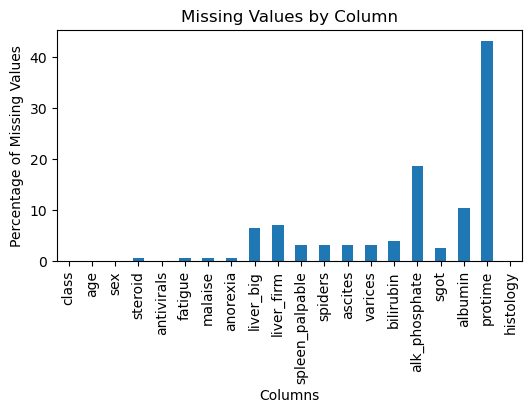

In [11]:
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a bar chart
plt.figure(figsize=(6, 3))
missing_percentage.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Values by Column')
plt.show()

#### There are 15 columns contain missing values. 
steroid, fatigue, malaise, anorexia contains 0.6% of missing values each column.

liver_big contains 6% of missing values.

liver_firm contains 7% of missing values.

spleen_palpable, spiders, ascites and varices contains 3.2% of missing values.

bilirubin contains 3.8% of missing values.

alk_phosphate contains 18.7% of missing values.

sgot contains 2.5% of missing values.

albumin contains 10% of missing values.

protime contains 43% of missing values.

### categorical column

In [12]:
df.dropna(subset='steroid', how='any', inplace=True)

df.steroid.isna().sum()

0

In [13]:
df.dropna(subset='fatigue', how='any', inplace=True)
df.fatigue.isna().sum()

0

In [14]:
df.dropna(subset='malaise', how='any', inplace=True)
df.malaise.isna().sum()

0

In [15]:
df.dropna(subset='anorexia', how='any', inplace=True)
df.anorexia.isna().sum()

0

In [16]:
df.dropna(subset='liver_big', how='any', inplace=True)
df.liver_big.isna().sum()

0

In [17]:
df.dropna(subset='liver_firm', how='any', inplace=True)
df.liver_firm.isna().sum()

0

In [18]:
df.dropna(subset='spleen_palpable', how='any', inplace=True)
df.spleen_palpable.isna().sum()

0

In [19]:
df.dropna(subset='spiders', how='any', inplace=True)
df.spiders.isna().sum()

0

In [20]:
df.dropna(subset='ascites', how='any', inplace=True)
df.ascites.isna().sum()

0

In [21]:
df.dropna(subset='varices', how='any', inplace=True)
df.varices.isna().sum()

0

In [22]:
len(df)

142

### numerical column

In [23]:
df.dropna(subset='bilirubin', how='any', inplace=True)

df.bilirubin.isna().sum() 

0

In [24]:
df.dropna(subset='alk_phosphate', how='any', inplace=True)

df.alk_phosphate.isna().sum()

0

In [25]:
df.dropna(subset='sgot', how='any', inplace=True)

df.sgot.isna().sum()

0

In [26]:
df.dropna(subset='albumin', how='any', inplace=True)

df.albumin.isna().sum()

0

In [27]:
df.dropna(subset='protime', how='any', inplace=True)

df.protime.isna().sum()

0

In [28]:
df.isna().sum()

class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
dtype: int64

In [29]:
len(df)

80

In [30]:
(80/155)*100

51.61290322580645

In [31]:
(155-80)/155*100

48.38709677419355

#### After removing all the missing values, which are 48.3% of the data, the remaining data is 51.6% (80 rows of data).

In [32]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95.0,28.0,4.0,75.0,1
10,2,39,1,1,1,2,2,2,1,1,2,2,2,2,1.3,78.0,30.0,4.4,85.0,1
11,2,32,1,2,1,1,2,2,2,1,2,1,2,2,1.0,59.0,249.0,3.7,54.0,1
12,2,41,1,2,1,1,2,2,2,1,2,2,2,2,0.9,81.0,60.0,3.9,52.0,1
13,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.2,57.0,144.0,4.9,78.0,1


In [33]:
df.alk_phosphate = df.alk_phosphate.round().astype(float)
df.sgot = df.sgot.round().astype(float)
df.protime = np.round(df.protime)
df.bilirubin = np.round(df.bilirubin,2)
df.albumin = np.round(df.albumin,2)

df.head(5)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95.0,28.0,4.0,75.0,1
10,2,39,1,1,1,2,2,2,1,1,2,2,2,2,1.3,78.0,30.0,4.4,85.0,1
11,2,32,1,2,1,1,2,2,2,1,2,1,2,2,1.0,59.0,249.0,3.7,54.0,1
12,2,41,1,2,1,1,2,2,2,1,2,2,2,2,0.9,81.0,60.0,3.9,52.0,1
13,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.2,57.0,144.0,4.9,78.0,1


In [34]:
# saving the dataframe
df.to_csv('hepatitis7_FMV_drop.csv', index=False)